In [0]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

import eli5
from eli5.sklearn import PermutationImportance


In [9]:
!pip install --upgrade tables

     |████████████████████████████████| 4.3MB 2.7MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [10]:
!pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


In [42]:
cd /content/drive/My Drive/Cloab Notebooks/matrix/matrix_two/dw_matrix_car/

/content/drive/My Drive/Cloab Notebooks/matrix/matrix_two/dw_matrix_car


In [43]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [16]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

In [17]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [25]:
# Uproszczona Wersja
# feats = ['car_id']
# X = df [feats].values

X=df[ ['car_id']].values
y=df[ 'car_id'].values

model = DummyRegressor()
model.fit(X,y)
y_pred = model.predict(X)

mae(y, y_pred)



40104.125306754606

In [26]:
  [ x for x in df.columns if 'price' in x]


['price_currency', 'price_details', 'price_value']

In [27]:
df['price_currency'].value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [28]:
  df['price_currency'].value_counts(normalize=True) * 100

PLN    99.80844
EUR     0.19156
Name: price_currency, dtype: float64

In [32]:
df['price_currency'].value_counts()

PLN    106290
Name: price_currency, dtype: int64

In [33]:
df = df[ df['price_currency'] != 'EUR']
df.shape

(106290, 155)

FEATURE ENGENERING

In [34]:
df.head()

,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,feature_kurtyny-powietrzne,feature_klimatyzacja-dwustrefowa,feature_światła-led,feature_czujnik-zmierzchu,feature_elektrycznie-ustawiane-lusterka,feature_asr-(kontrola-trakcji),feature_poduszka-powietrzna-kierowcy,feature_cd,feature_elektryczne-szyby-przednie,feature_poduszka-powietrzna-pasażera,feature_system-start-stop,feature_światła-do-jazdy-dziennej,feature_komputer-pokładowy,feature_elektryczne-szyby-tylne,feature_klimatyzacja-manualna,feature_tapicerka-welurowa,feature_czujnik-deszczu,feature_światła-przeciwmgielne,feature_ogrzewanie-postojowe,feature_radio-niefabryczne,feature_regulowane-zawieszenie,feature_ogranicznik-prędkości,feature_zmieniarka-cd,feature_szyberdach,feature_isofix,feature_asystent-pasa-ruchu,feature_alufelgi,feature_bluetooth,feature_nawigacja-gps,feature_asystent-parkowania,...,param_particle-filter,param_zarejestrowany-w-polsce,param_oferta-od,param_moc,param_make,param_kraj-pochodzenia,param_engine-power,param_year,param_serwisowany-w-aso,param_rodzaj-paliwa,param_możliwość-finansowania,param_registered-in-poland,param_transmission,param_miesięczna-rata,param_kod-silnika,param_version,param_opłata-początkowa,param_model-pojazdu,param_pojemność-skokowa,param_kierownica-po-prawej-(anglik),param_fuel-type,param_vat-free,param_acrylic,param_damaged,param_door-count,param_tuning,param_filtr-cząstek-stałych,param_nr-of-seats,param_kolor,param_engine-capacity,param_pearl,param_stan,param_wersja,param_emisja-co2,param_body-type,param_matowy,param_bezwypadkowy,param_akryl-(niemetalizowany),param_monthly-payment-value,car_id
0,"[Osobowe, Dacia, Logan, Dacia Logan II (2012-)]","13:23, 5 marca 2018",PLN,Cena Brutto,45100.0,"Krasne 7A - 36-007 Krasne, rzeszowski, Podkarp...",AUTO SPEKTRUM,Dealer,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,...,None,None,Firmy,90 KM,None,None,None,None,None,Benzyna+LPG,None,None,None,None,None,None,None,Logan,898 cm3,None,None,None,None,None,None,None,None,None,Inny kolor,None,None,Nowe,II (2012-),None,None,None,Tak,None,None,0
2,"[Osobowe, Peugeot, 3008, Peugeot 3008 I (2009-...","15:48, 5 marca 2018",PLN,"Cena Brutto, Do negocjacji, Faktura VAT",28000.0,"Tomaszów Mazowiecki, tomaszowski, Łódzkie",None,Osoba prywatna,False,False,False,True,False,False,True,True,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,None,Tak,Osoby prywatnej,115 KM,None,Polska,None,None,None,Diesel,None,None,None,None,None,None,None,3008,1 560 cm3,None,None,None,None,None,None,None,None,None,Czarny,None,None,Używane,I (2009-2016),None,None,None,Tak,None,None,2
3,"[Osobowe, Porsche, Cayenne, Porsche Cayenne II...","06:30, 4 marca 2018",PLN,"Cena Netto, Do negocjacji, Faktura VAT",229500.0,"Kępińska 24a - 63-640 Bralin, kępiński, Wielko...",P.W. GRIB,Dealer,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,False,True,True,True,True,True,False,True,True,True,True,...,None,None,Firmy,262 KM,None,Niemcy,None,None,Tak,Diesel,Tak,None,None,None,None,None,None,Cayenne,3 000 cm3,None,None,None,None,None,None,None,None,None,Czarny,None,None,Używane,II (2010-),None,None,None,None,None,None,3
4,"[Osobowe, Peugeot, 308, Peugeot 308 T7 (2008-2...","08:46, 3 marca 2018",PLN,"Cena Brutto, Do negocjacji",19500.0,"Limanowa, limanowski, Małopolskie",None,Osoba prywatna,False,False,False,False,False,True,True,True,True,True,True,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False,...,None,Tak,Osoby prywatnej,110 KM,None,Polska,None,None,Tak,Diesel,None,None,None,None,None,None,None,308,1

In [35]:
df['param_color'].factorize()

(array([-1, -1, -1, ..., -1, -1, -1]),
 Index(['Czarny', 'Srebrny', 'Złoty', 'Bordowy', 'Biały', 'Szary', 'Beżowy',
        'Zielony', 'Fioletowy', 'Niebieski', 'Inny kolor', 'Brązowy', 'Żółty'],
       dtype='object'))

In [38]:
df['param_color'].factorize()

(array([-1, -1, -1, ..., -1, -1, -1]),
 Index(['Czarny', 'Srebrny', 'Złoty', 'Bordowy', 'Biały', 'Szary', 'Beżowy',
        'Zielony', 'Fioletowy', 'Niebieski', 'Inny kolor', 'Brązowy', 'Żółty'],
       dtype='object'))

In [40]:
df['param_color'].factorize()[0]

array([-1, -1, -1, ..., -1, -1, -1])

In [0]:
SUFFIX_CAT  = '__cat'
for feat in df.columns:
  if isinstance(df[feat][0], list): continue
  
  factorize_values = df[feat].factorize()[0]
  if SUFFIX_CAT in feat: 
   df[feat] = factorize_values
  else:
   df[feat + SUFFIX_CAT] = factorize_values

# Rozwinięcie:
# 1 Iteracja pętli
#'a'
#'a__cat'
# 2 Iteracja
#'a'
#'a__cat'
#'a_cat__cat'
# Tutaj w drugiej Iteracji pojawi się jeszcze raz __cata - Nie chcemy tego tak mieć. 


In [46]:
cat_feats = [ x for x in df.columns if SUFFIX_CAT in x ]
cat_feats = [x for x in cat_feats if 'price' not in x]
len(cat_feats)

151

In [48]:
X = df[cat_feats].values
y = df['price_value'].values


model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X,y, cv=3, scoring='neg_mean_absolute_error' )
np.mean(scores)

-19695.13091100928

Sprawdzanie Cech - które są Ciekawe



In [51]:
m = DecisionTreeRegressor(max_depth=5)
m.fit(X,y)

imp = PermutationImportance (m, random_state=0).fit(X,y)
eli5.show_weights(imp, feature_names=cat_feats)

Weight,Feature
0.2570 ± 0.0084,param_napęd__cat
0.2033 ± 0.0037,param_stan__cat
0.1957 ± 0.0021,param_faktura-vat__cat
0.1447 ± 0.0075,param_rok-produkcji__cat
0.0629 ± 0.0035,param_moc__cat
0.0415 ± 0.0012,feature_kamera-cofania__cat
0.0384 ± 0.0023,param_skrzynia-biegów__cat
0.0255 ± 0.0038,param_marka-pojazdu__cat
0.0196 ± 0.0014,param_pojemność-skokowa__cat
0.0162 ± 0.0003,feature_bluetooth__cat


In [53]:
cd /content/drive/My Drive/Cloab Notebooks/matrix/matrix_two/dw_matrix_car/

/content/drive/My Drive/Cloab Notebooks/matrix/matrix_two/dw_matrix_car


In [59]:
ls

data/            day2_visualization.ipynb  LICENSE
Day1_meta.ipynb  Day3_Model.ipynb          README.md


Trzeba potem przenieść pliki z dysku Google do powyższej ścieżki


In [0]:
!git config --global user.email "smachnio@wp.pl"
!git config --global user.name "Sylwek"

DODANIE ZMIAN DO GITHUBA


In [71]:
!git add Day3_Model.ipynb
!git add Day1_meta.ipynb
!git commit -m "add model"

[master ef8487c] add model
 1 file changed, 1 insertion(+), 1 deletion(-)


In [0]:
GITHUB_TOKEN='44d04f6f6c31db28fe53daf3bf0519f13ff6e0b6'

In [0]:
GITHUB_URL = 'https://{}@github.com/smachnio/dw_matrix_car.git'.format(GITHUB_TOKEN)

In [80]:
!git push -u origin master

fatal: could not read Password for 'https://61911b90a3b5fba8c3b4d4ea9e220b6bdbc37738@github.com': No such device or address


Zadanie z Gwiazdką

In [0]:
def group_and_barplot (feat_groupby, feat_agg='price_value', agg_funcs=[np.mean,np.median, np.size], feat_sort='mean',top=50, subplots=True):
 return(
     df
     .groupby(feat_groupby)[feat_agg]
     .agg(agg_funcs)
     .sort_values(by=feat_sort,ascending=False)
     .head(top)
 ) .plot(kind='bar', figsize=(15,5), subplots= subplots)


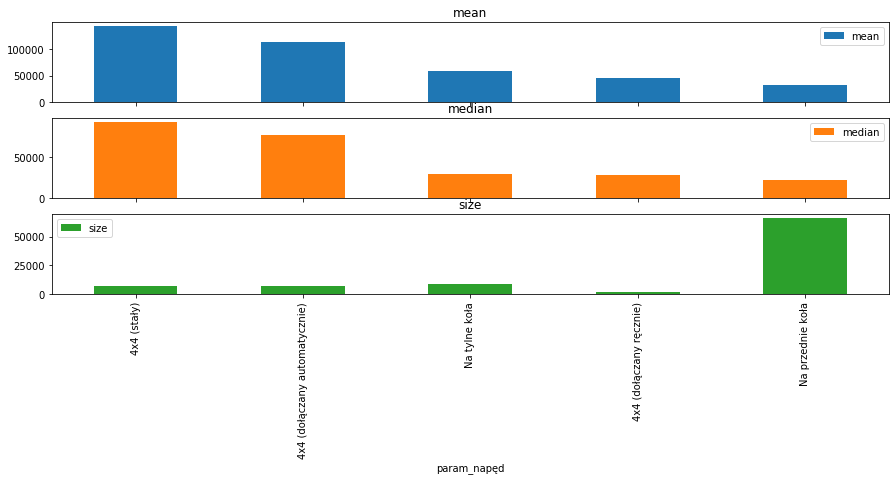

In [67]:
group_and_barplot('param_napęd');